In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb
from array import array

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746


In [19]:
mcfile = 'dETdeta_analysis_23727_z=0_no_em_hottowers+fullEmcal_nozs_mc_noweight_0-90_ampt.root'
#vardatafile = 'dETdeta_analysis_23727_z=0_no_em_hottowers_nopipe_notrackers+fullEmcal_nozs_mc_noweight_0-90_ampt.root'
vardatafile = 'dETdeta_analysis_23727_z=0_no_em_hottowers_notrackers+fullEmcal_nozs_mc_noweight_0-90_ampt.root'
f1 = ROOT.TFile.Open(mcfile)
h_eT_sim_emcal = TH1F(f1.Get("h_eT_emcal"))
h_eT_sim_ihcal = TH1F(f1.Get("h_eT_ihcal"))
h_eT_sim_ohcal = TH1F(f1.Get("h_eT_ohcal"))
h_eT_sim_emcal.SetDirectory(0)
h_eT_sim_ihcal.SetDirectory(0)
h_eT_sim_ohcal.SetDirectory(0)
f1.Close()
f5 = ROOT.TFile.Open(vardatafile)
h_eT_var_emcal = TH1F(f5.Get("h_eT_emcal"))
h_eT_var_ihcal = TH1F(f5.Get("h_eT_ihcal"))
h_eT_var_ohcal = TH1F(f5.Get("h_eT_ohcal"))
h_eT_var_emcal.SetDirectory(0)
h_eT_var_ihcal.SetDirectory(0)
h_eT_var_ohcal.SetDirectory(0)
f5.Close()

In [20]:
emcal_ratio = TH1F(h_eT_sim_emcal.Clone("emcal_ratio"))
emcal_ratio.Divide(h_eT_var_emcal)
ihcal_ratio = TH1F(h_eT_sim_ihcal.Clone("ihcal_ratio"))
ihcal_ratio.Divide(h_eT_var_ihcal)
ohcal_ratio = TH1F(h_eT_sim_ohcal.Clone("ohcal_ratio"))
ohcal_ratio.Divide(h_eT_var_ohcal)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_reco_w_ratio_ampt_mb_inner_material.png has been created


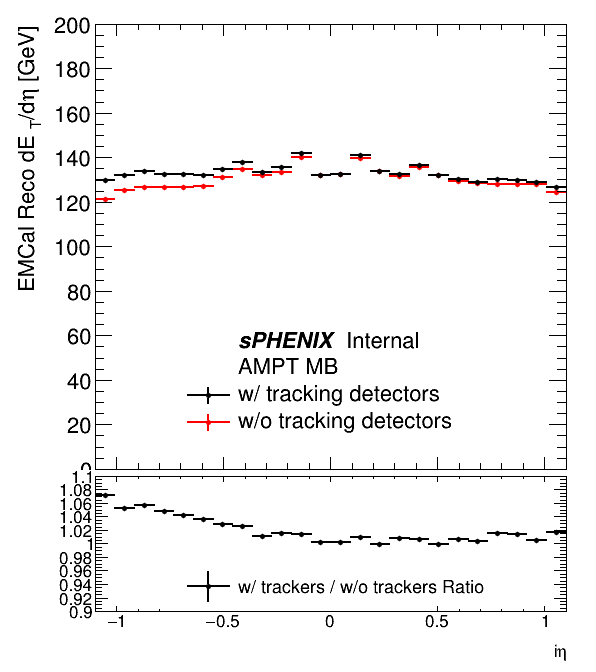

In [50]:
canvas = TCanvas("canvas","",600,700)

pad_top = ROOT.TPad("pad_top", "", 0.0, 0.28, 1.0, 1.0)
pad_top.SetBottomMargin(0.03)
pad_top.Draw()
pad_top.cd()

leg = ROOT.TLegend(.3,.1,.7,.32)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","AMPT MB","")
leg.AddEntry(h_eT_sim_emcal,"w/ tracking detectors","lep")
leg.AddEntry(h_eT_var_emcal,"w/o tracking detectors","lep")
leg.SetBorderSize(0)
h_eT_sim_emcal.SetLineColor(1)
h_eT_var_emcal.SetLineColor(2)
h_eT_sim_emcal.SetMarkerStyle(8)
h_eT_sim_emcal.SetMarkerSize(0.7)
h_eT_sim_emcal.SetMarkerColor(1)
h_eT_var_emcal.SetMarkerStyle(8)
h_eT_var_emcal.SetMarkerSize(0.7)
h_eT_var_emcal.SetMarkerColor(2)
h_eT_var_emcal.GetYaxis().SetRangeUser(0,200)
h_eT_sim_emcal.SetStats(0)
h_eT_var_emcal.SetStats(0)
h_eT_var_emcal.SetYTitle("EMCal Reco dE_{T}/d#eta [GeV]")
h_eT_var_emcal.SetXTitle("#eta")
h_eT_var_emcal.Draw()
h_eT_sim_emcal.Draw('same')
leg.Draw()

canvas.cd()
pad_bottom = ROOT.TPad("pad_bottom", "", 0.0, 0.0, 1.0, 0.3)
pad_bottom.SetTopMargin(0.03)
pad_bottom.SetBottomMargin(0.3)
pad_bottom.Draw()
pad_bottom.cd()

leg1 = ROOT.TLegend(.3,.3,.7,.55)
leg1.AddEntry(emcal_ratio,"w/ trackers / w/o trackers Ratio","lep")
leg1.SetTextSize(0.1)
leg1.SetBorderSize(0)
emcal_ratio.GetXaxis().SetLabelSize(0.09)
emcal_ratio.GetYaxis().SetLabelSize(0.09)
emcal_ratio.SetLineColor(1)
emcal_ratio.SetMarkerStyle(8)
emcal_ratio.SetMarkerSize(0.7)
emcal_ratio.SetMarkerColor(1)
emcal_ratio.GetYaxis().SetRangeUser(0.9,1.1)
emcal_ratio.SetStats(0)
emcal_ratio.SetYTitle("")
emcal_ratio.GetXaxis().SetTitle("i#eta")
emcal_ratio.GetXaxis().SetTitleSize(0.09)
emcal_ratio.Draw()
leg1.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_reco_w_ratio_ampt_mb_inner_material.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_reco_w_ratio_ampt_mb_inner_material.png has been created


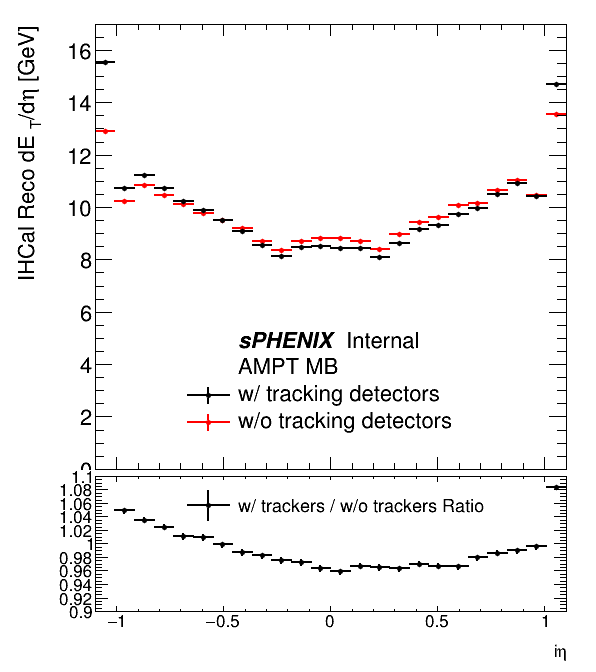

In [51]:
canvas = TCanvas("canvas","",600,700)

pad_top = ROOT.TPad("pad_top", "", 0.0, 0.28, 1.0, 1.0)
pad_top.SetBottomMargin(0.03)
pad_top.Draw()
pad_top.cd()

leg = ROOT.TLegend(.3,.1,.7,.32)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","AMPT MB","")
leg.AddEntry(h_eT_sim_ihcal,"w/ tracking detectors","lep")
leg.AddEntry(h_eT_var_ihcal,"w/o tracking detectors","lep")
leg.SetBorderSize(0)
h_eT_sim_ihcal.SetLineColor(1)
h_eT_var_ihcal.SetLineColor(2)
h_eT_sim_ihcal.SetMarkerStyle(8)
h_eT_sim_ihcal.SetMarkerSize(0.7)
h_eT_sim_ihcal.SetMarkerColor(1)
h_eT_var_ihcal.SetMarkerStyle(8)
h_eT_var_ihcal.SetMarkerSize(0.7)
h_eT_var_ihcal.SetMarkerColor(2)
h_eT_var_ihcal.GetYaxis().SetRangeUser(0,17)
h_eT_sim_ihcal.SetStats(0)
h_eT_var_ihcal.SetStats(0)
h_eT_var_ihcal.SetYTitle("IHCal Reco dE_{T}/d#eta [GeV]")
h_eT_var_ihcal.SetXTitle("#eta")
h_eT_var_ihcal.Draw()
h_eT_sim_ihcal.Draw('same')
leg.Draw()

canvas.cd()
pad_bottom = ROOT.TPad("pad_bottom", "", 0.0, 0.0, 1.0, 0.3)
pad_bottom.SetTopMargin(0.03)
pad_bottom.SetBottomMargin(0.3)
pad_bottom.Draw()
pad_bottom.cd()

leg1 = ROOT.TLegend(.3,.7,.7,.95)
leg1.AddEntry(ihcal_ratio,"w/ trackers / w/o trackers Ratio","lep")
leg1.SetTextSize(0.1)
leg1.SetBorderSize(0)
ihcal_ratio.GetXaxis().SetLabelSize(0.09)
ihcal_ratio.GetYaxis().SetLabelSize(0.09)
ihcal_ratio.SetLineColor(1)
ihcal_ratio.SetMarkerStyle(8)
ihcal_ratio.SetMarkerSize(0.7)
ihcal_ratio.SetMarkerColor(1)
ihcal_ratio.GetYaxis().SetRangeUser(0.9,1.1)
ihcal_ratio.SetStats(0)
ihcal_ratio.SetYTitle("")
ihcal_ratio.GetXaxis().SetTitle("i#eta")
ihcal_ratio.GetXaxis().SetTitleSize(0.09)
ihcal_ratio.Draw()
leg1.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_reco_w_ratio_ampt_mb_inner_material.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/ohcal_reco_w_ratio_ampt_mb_inner_material.png has been created


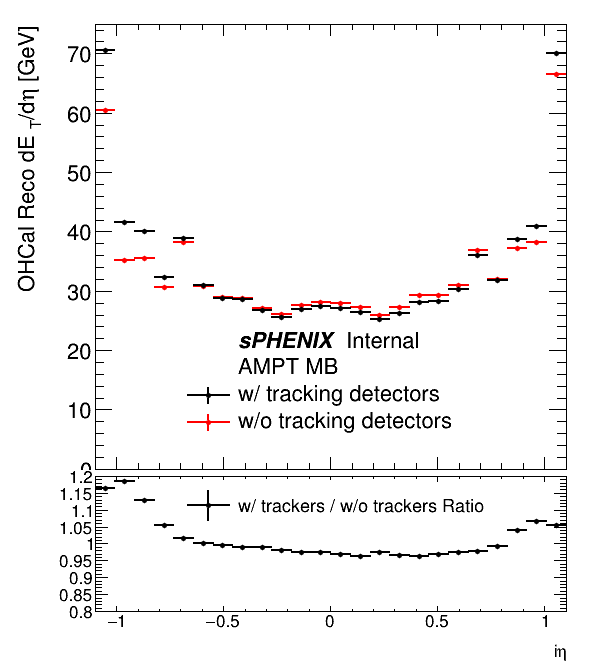

In [52]:
canvas = TCanvas("canvas","",600,700)

pad_top = ROOT.TPad("pad_top", "", 0.0, 0.28, 1.0, 1.0)
pad_top.SetBottomMargin(0.03)
pad_top.Draw()
pad_top.cd()

leg = ROOT.TLegend(.3,.1,.7,.32)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","AMPT MB","")
leg.AddEntry(h_eT_sim_ohcal,"w/ tracking detectors","lep")
leg.AddEntry(h_eT_var_ohcal,"w/o tracking detectors","lep")
leg.SetBorderSize(0)
h_eT_sim_ohcal.SetLineColor(1)
h_eT_var_ohcal.SetLineColor(2)
h_eT_sim_ohcal.SetMarkerStyle(8)
h_eT_sim_ohcal.SetMarkerSize(0.7)
h_eT_sim_ohcal.SetMarkerColor(1)
h_eT_var_ohcal.SetMarkerStyle(8)
h_eT_var_ohcal.SetMarkerSize(0.7)
h_eT_var_ohcal.SetMarkerColor(2)
h_eT_var_ohcal.GetYaxis().SetRangeUser(0,75)
h_eT_sim_ohcal.SetStats(0)
h_eT_var_ohcal.SetStats(0)
h_eT_var_ohcal.SetYTitle("OHCal Reco dE_{T}/d#eta [GeV]")
h_eT_var_ohcal.SetXTitle("#eta")
h_eT_var_ohcal.Draw()
h_eT_sim_ohcal.Draw('same')
leg.Draw()

canvas.cd()
pad_bottom = ROOT.TPad("pad_bottom", "", 0.0, 0.0, 1.0, 0.3)
pad_bottom.SetTopMargin(0.03)
pad_bottom.SetBottomMargin(0.3)
pad_bottom.Draw()
pad_bottom.cd()

leg1 = ROOT.TLegend(.3,.7,.7,.95)
leg1.AddEntry(ohcal_ratio,"w/ trackers / w/o trackers Ratio","lep")
leg1.SetTextSize(0.1)
leg1.SetBorderSize(0)
ohcal_ratio.GetXaxis().SetLabelSize(0.09)
ohcal_ratio.GetYaxis().SetLabelSize(0.09)
ohcal_ratio.SetLineColor(1)
ohcal_ratio.SetMarkerStyle(8)
ohcal_ratio.SetMarkerSize(0.7)
ohcal_ratio.SetMarkerColor(1)
ohcal_ratio.GetYaxis().SetRangeUser(0.8,1.2)
ohcal_ratio.SetStats(0)
ohcal_ratio.SetYTitle("")
ohcal_ratio.GetXaxis().SetTitle("i#eta")
ohcal_ratio.GetXaxis().SetTitleSize(0.09)
ohcal_ratio.Draw()
leg1.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ohcal_reco_w_ratio_ampt_mb_inner_material.png')

In [ ]:
exfile = ROOT.TFile.Open('../runs23727_23746/MC/dETdeta_variation_MC_0-5.root')
emcal_detdeta_ex = TH1F(exfile.Get("emcal_detdeta_dev"))
ihcal_detdeta_ex = TH1F(exfile.Get("ihcal_detdeta_dev"))
ohcal_detdeta_ex = TH1F(exfile.Get("ohcal_detdeta_dev"))
calo_detdeta_ex = TH1F(exfile.Get("ihcal_detdeta_dev"))
emcal_detdeta_ex.SetDirectory(0)
ihcal_detdeta_ex.SetDirectory(0)
ohcal_detdeta_ex.SetDirectory(0)
calo_detdeta_ex.SetDirectory(0)
exfile.Close()
emcal_detdeta_var = TH1F(emcal_detdeta_ex.Clone("emcal_detdeta_var"))
ihcal_detdeta_var = TH1F(ihcal_detdeta_ex.Clone("ihcal_detdeta_var"))
ohcal_detdeta_var = TH1F(ohcal_detdeta_ex.Clone("ohcal_detdeta_var"))
calo_detdeta_var = TH1F(calo_detdeta_ex.Clone("calo_detdeta_var"))
for j in range(1, emcal_detdeta_var.GetNbinsX() + 1):
    emcal_detdeta_var.SetBinContent(j, 1-emcal_ratio_ampt.GetBinContent(j))
    ihcal_detdeta_var.SetBinContent(j, 1-ihcal_ratio_ampt.GetBinContent(j))
    ohcal_detdeta_var.SetBinContent(j, 1-ohcal_ratio_ampt.GetBinContent(j))
    calo_detdeta_var.SetBinContent(j, 1-calo_ratio_ampt.GetBinContent(j))

In [ ]:
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
emcal_avg = [689,585,435,293,189,117,69]
ihcal_avg = [756,645,483,326,212,133,78]
ohcal_avg = [666,567,423,283,184,114,68]
calo_avg = [682,584,438,294,191,118,69]
for i, cent in enumerate(cents):
    outfile = ROOT.TFile.Open('dETdeta_variation_phys_list_'+cent+'.root',"RECREATE")
    emcal_detdeta_dev = TH1F(emcal_detdeta_var.Clone("emcal_detdeta_dev"))
    ihcal_detdeta_dev = TH1F(ihcal_detdeta_var.Clone("ihcal_detdeta_dev"))
    ohcal_detdeta_dev = TH1F(ohcal_detdeta_var.Clone("ohcal_detdeta_dev"))
    calo_detdeta_dev = TH1F(calo_detdeta_var.Clone("calo_detdeta_dev"))
    emcal_detdeta_dev.Scale(emcal_avg[i])
    ihcal_detdeta_dev.Scale(ihcal_avg[i])
    ohcal_detdeta_dev.Scale(ohcal_avg[i])
    calo_detdeta_dev.Scale(calo_avg[i])
    emcal_detdeta_dev.Write()
    ihcal_detdeta_dev.Write()
    ohcal_detdeta_dev.Write()
    calo_detdeta_dev.Write()
    outfile.Write()
    outfile.Close()  